# Problem Statement :  (Predict Customers who will leave the bank,remain and why, with what to do to keep the customers.)


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#pre">Recommendations</a></li>
<li><a href="#mod">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction

#### A bank wants to know the customers who are likely going to leave the bank,  those who will still remain as customers, why and what to do to keep their customers .

In this Project i will be looking into those customers who are leaving and staying and the **Why**, i will raise relevant questions for analysis, build model and deploy for real life production so that the bank can get better decisions on how to keep her customers and make more money

<a id='wrangling'></a>
## DataWrangling

### Gather the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import psycopg2

conn=psycopg2.connect(
host='localhost',
database = 'master',
user ='postgres',
password = 242129,
port = 5432)

churn=pd.read_sql_query("""
select * from 
 Nigeriabreweries.bankchurn""", conn)
 
conn.close() #closes the database connection

C:\Users\512GB\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


### Assess

In [3]:
churn.head()

,customers_id,surname,creditscore,geography,gender,age,tenure,balance,number_of_products,has_credit_card,is_active_member,estimated_salary,exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#get the dimension
churn.shape

(10000, 13)

In [5]:
churn.columns

Index(['customers_id', 'surname', 'creditscore', 'geography', 'gender', 'age',
       'tenure', 'balance', 'number_of_products', 'has_credit_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [6]:
#display last five rows
churn.tail()

,customers_id,surname,creditscore,geography,gender,age,tenure,balance,number_of_products,has_credit_card,is_active_member,estimated_salary,exited
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
churn.isnull().sum()

customers_id          0
surname               0
creditscore           0
geography             0
gender                0
age                   0
tenure                0
balance               0
number_of_products    0
has_credit_card       0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64

In [8]:
churn.duplicated().sum()

0

In [9]:
churn.dtypes

customers_id            int64
surname                object
creditscore            object
geography              object
gender                 object
age                     int64
tenure                  int64
balance               float64
number_of_products      int64
has_credit_card         int64
is_active_member        int64
estimated_salary      float64
exited                  int64
dtype: object

In [10]:
churn['geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

In [11]:
churn['tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: tenure, dtype: int64

In [12]:
churn['number_of_products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: number_of_products, dtype: int64

In [13]:
churn['is_active_member'].value_counts()

1    5151
0    4849
Name: is_active_member, dtype: int64

In [14]:
churn['has_credit_card'].value_counts()

1    7055
0    2945
Name: has_credit_card, dtype: int64

<AxesSubplot:>

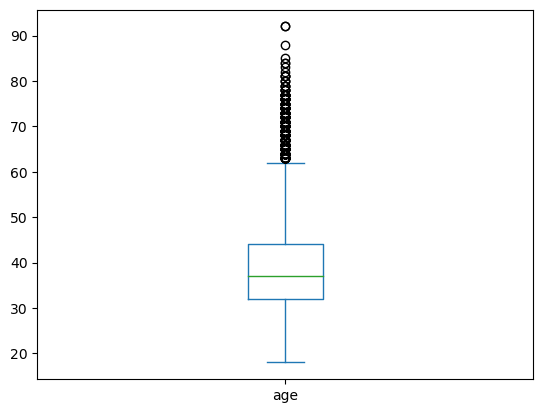

In [15]:
#check if there are outliers
churn['age'].plot(kind='box')

<AxesSubplot:>

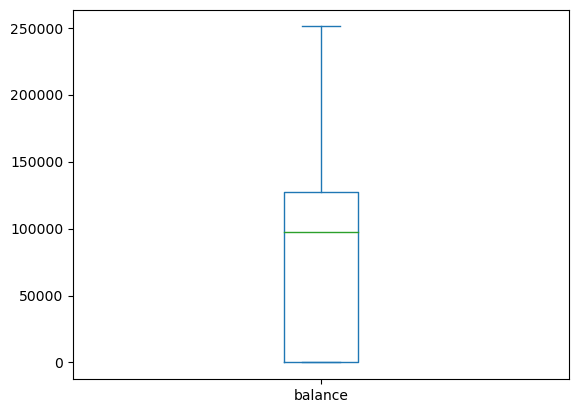

In [16]:
#check if there are outliers
churn['balance'].plot(kind='box')

**Data Quality Issues**
- Some variables are not descriptive enough
- Wrong data types
- some variables are not relevant to the model prediction

## Data Cleaning


#### Clean
- Drop irrelevant variables

#### Code

In [17]:
churn=churn.drop(columns=['customers_id','surname'], axis=1)

#### Test

In [18]:
churn.head()

,creditscore,geography,gender,age,tenure,balance,number_of_products,has_credit_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
churn.columns

Index(['creditscore', 'geography', 'gender', 'age', 'tenure', 'balance',
       'number_of_products', 'has_credit_card', 'is_active_member',
       'estimated_salary', 'exited'],
      dtype='object')

In [20]:
churn.dtypes

creditscore            object
geography              object
gender                 object
age                     int64
tenure                  int64
balance               float64
number_of_products      int64
has_credit_card         int64
is_active_member        int64
estimated_salary      float64
exited                  int64
dtype: object

In [21]:
#save the data
churn.to_csv('churn_model.csv')

In [22]:
churn['creditscore']=pd.to_numeric(churn['creditscore'], errors='coerce')

In [23]:
churn.head()

,creditscore,geography,gender,age,tenure,balance,number_of_products,has_credit_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<a id='eda'></a>
## Exploratory Data Analysis

## Univariate Analysis

In [24]:
churn.describe()

,creditscore,age,tenure,balance,number_of_products,has_credit_card,is_active_member,estimated_salary,exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


from the summary statistics ran above, the **credit score** variable has 25% of data below 584, 75% below 718 and  half credit score are below 652. the standard deviation of Credit score being approximately 97, shows that the data is much distributed away from each other. 
The variable **Age** has a standard deviation of approximately 10 comparing this to that of the Credit score shows that the age probably not too distributed away from each other but it is possible that there are outliers in the Age column because the maximum age is 92 and 75% below is 44, I will use visuals to expose this much better and also explore other columns.

### Question 1 What is the distribution of Age and Credit Scores of Bank Customers.

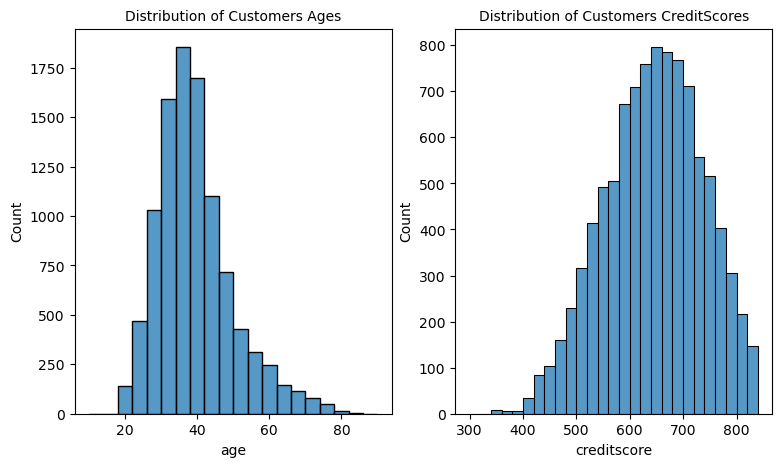

In [25]:

plt.figure(figsize=[9,5])
base_color=sns.color_palette()[0]

plt.subplot(1,2,1)
binsize=np.arange(10, churn['age'].max(), 4)
sns.histplot(data=churn, x='age', color=base_color, bins=binsize)
plt.title('Distribution of Customers Ages', fontsize=10)


plt.subplot(1,2,2)
binsize=np.arange(300, churn['creditscore'].max(), 20)
sns.histplot(data=churn, x='creditscore', color=base_color, bins=binsize)
plt.title('Distribution of Customers CreditScores', fontsize=10);



### Question 2(What is the Distribution of Customers Estimated Salary and Balance?)

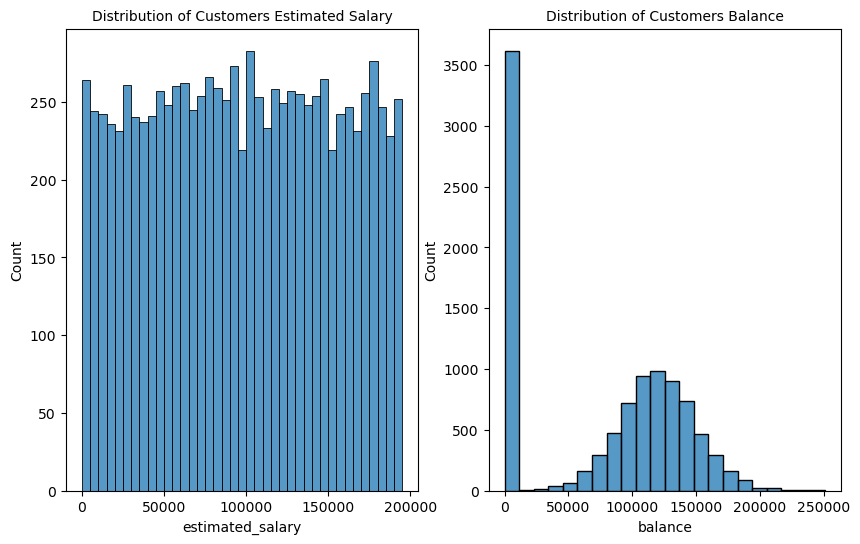

In [26]:
plt.figure(figsize=[10,6])

binsize=np.arange(5, churn['estimated_salary'].max(),5000)
base_color=sns.color_palette()[0]
plt.subplot(1,2,1)
sns.histplot(data=churn, x='estimated_salary', color=base_color, bins=binsize)
plt.title('Distribution of Customers Estimated Salary', fontsize=10)


binsize=np.arange(0, churn['balance'].max(), 100)
plt.subplot(1,2,2)
sns.histplot(data=churn, x='balance', color=base_color)
plt.title('Distribution of Customers Balance', fontsize=10);

### Question 3( What Georgraphy/Country is more common among Bank Customers ?)

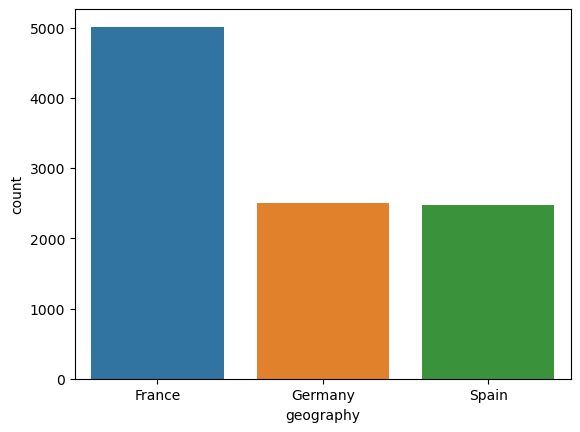

In [27]:
sns.countplot(data=churn, x='geography', order=churn['geography'].value_counts().index);

From the bar graph of customers geography, customers from France are 5000, while customers from Germany and Spain are not up to 3000. Hence that might mean that most of the bank customers are actually from France based on some reasons which we will dive in deeply into in later exploration.

### Question 4(What is the percentage of Customers who have Left the Bank  and Customers who remained?)

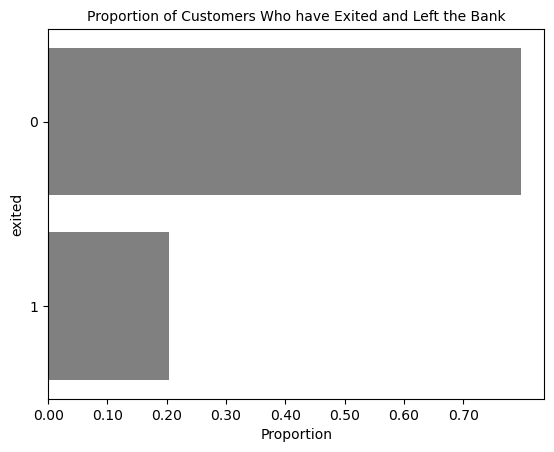

In [28]:
exit_max=churn['exited'].value_counts()[0]

churn_max=churn.shape[0]
exit_prop=exit_max/churn_max
exit_prop

x_ticks=np.arange(0,exit_prop, 0.1)
x_label=['{:0.2f}'.format(v) for v in x_ticks]
sns.countplot(data=churn, y='exited', color='grey')
plt.xticks(x_ticks*churn_max, x_label)
plt.xlabel('Proportion')
plt.title('Proportion of Customers Who have Exited and Left the Bank', fontsize=10);

From the Absolute Frequency plot above, More than 70% of the bank customers are still remaining in the bank while about 20% of the bank customers have left the bank. This could be due to a whole lot of reasons. 20% customers is a whole lot of loss to a bank hence, I will do further explorations to show why they left and what to do to keep the ones who have not left and also to get more customers.

### Question 5(What Proportion of Bank Customers Have Credit Cards and Are Still Active Members?)

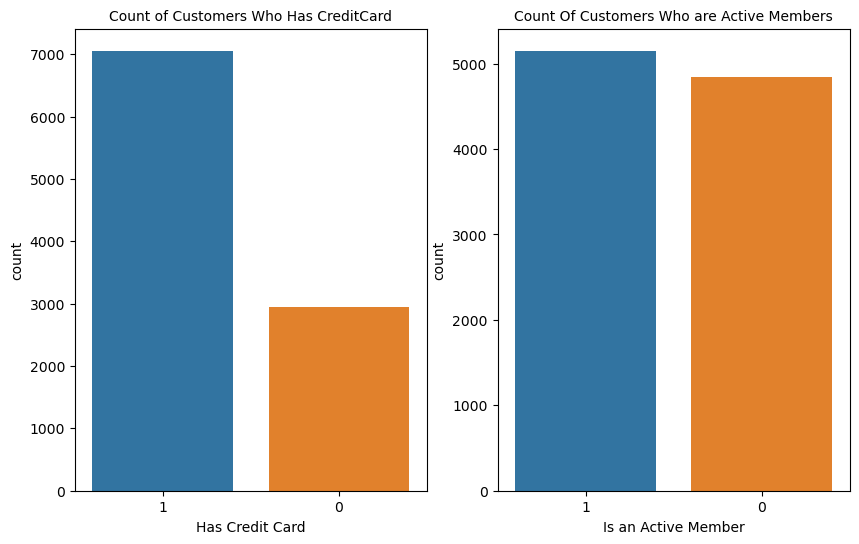

In [29]:
plt.figure(figsize=[10,6])

plt.subplot(1,2,1)
sns.countplot(data=churn, x='has_credit_card', order=churn['has_credit_card'].value_counts().index)
plt.title('Count of Customers Who Has CreditCard', fontsize=10)
plt.xlabel('Has Credit Card')

plt.subplot(1,2,2)
sns.countplot(data=churn, x='is_active_member', order=churn['is_active_member'].value_counts().index)
plt.title('Count Of Customers Who are Active Members', fontsize=10)
plt.xlabel('Is an Active Member');

From the barchart, i noticed that about 7000 customers have credit cards while less than 3000 do not have credit cards. The reason the do not have credit cards might be due to personal interest or even based on the bank attitude towards those customers.If you remeber from a chart i plotted above where less than 3000 customers are from Germany and spain, should also say that those customers with no credit card a now from these country? that will be a very wrong guess though there is a possibility but not certain. 
Also from the second chat above, more than 5000 customers are still active members to the bank while  more than 4500 but less than 5000 customers are also not active members of the bank. This shows that a large portion of the bank customers are inactive though they still have their details with the bank. It is possible those inactive members have left or are just there in a dormant way. I will dig further to see why.

## Bivariate Analysis

### Question 6(What is the average Salary of customers who have Either Left the bank or still remain?)

In [30]:
churn.groupby(['exited'])['estimated_salary'].mean()

exited
0     99738.391772
1    101465.677531
Name: estimated_salary, dtype: float64

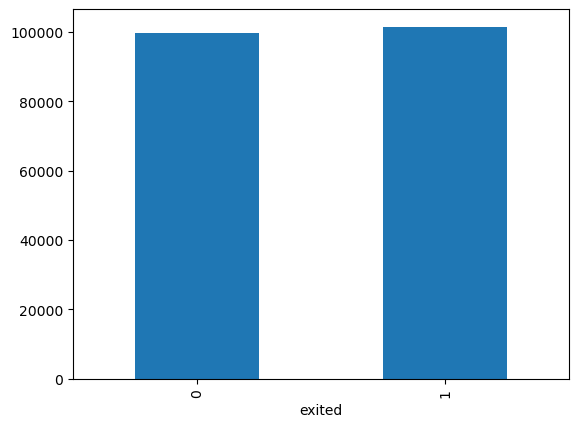

In [31]:
churn.groupby(['exited'])['estimated_salary'].mean().plot(kind='bar');

Obviously enough, the average salary of customers who have left the bank is not too much than the average salary of customers who are still in the bank. This could mean that, a customer leaving a bank or not has nothing to do with his or her salary. There has to still the some other factors we wiil explore.

### Question 7 (What is the effect of Customers Balance and Age on Leaving the bank?)

In [32]:
churn['age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83], dtype=int64)

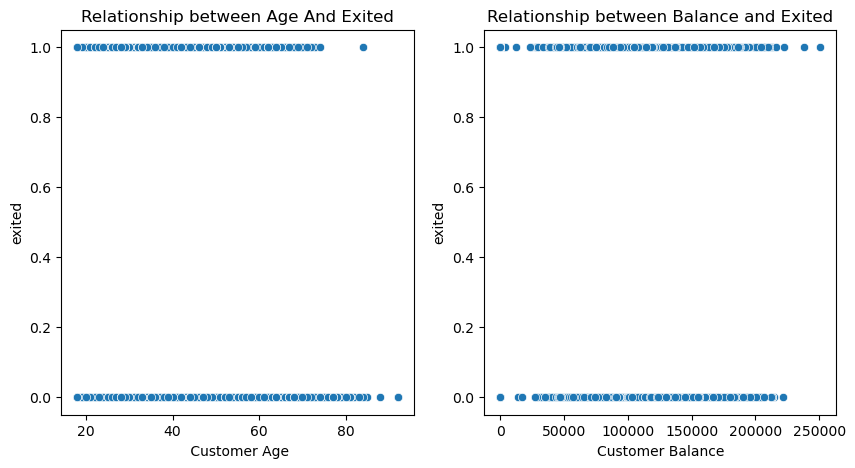

In [33]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
sns.scatterplot(data=churn, x='age', y='exited')
plt.xlabel(' Customer Age')
plt.ylabel('exited')
plt.title('Relationship between Age And Exited', fontsize=12)

plt.subplot(1,2,2)
sns.scatterplot(data=churn, x='balance', y='exited')
plt.xlabel('Customer Balance')
plt.title('Relationship between Balance and Exited', fontsize=12);

There isn't any particular relationship between Customers Age, Customer balance and them leaving or staying in the bank.

From the Scatter plot, it is seen that  Customers within the age of 20 and 75 or so have left the bank and just an hold customer who is above 80 and have also left the bank. since we only have one very old person who left the bank, this could be due to so many reasons e.g Death while there are also customers between the age of 20 and pretty more than 82 who are still in the bank. Hence, it means probably Younger Customers tend to leave the bank compared to the older ones.

From the Second plot to the right,it is seen that customers who have actully left the been and those who are still in the bank seem to have balance of at least 250,000 , though only two of the bank customers who have left the bank have very close to 250,000 in their accounty. Hence, there are still like one or two customers who have 0 balance in their account. 

In [34]:
churn.head()

,creditscore,geography,gender,age,tenure,balance,number_of_products,has_credit_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Question 8 ( What is the Distribution of  Customers Tenure based on Whether have exited or not?)

In [35]:
churn['tenure'].describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: tenure, dtype: float64

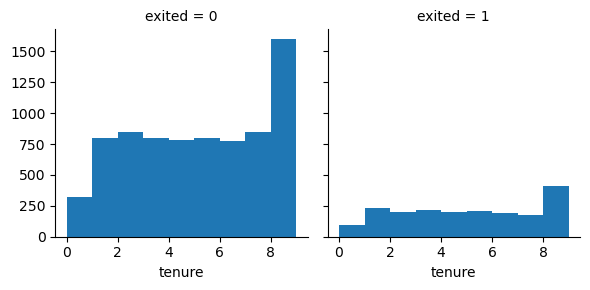

In [36]:
binsize=np.arange(0, churn['tenure'].max(), 1)
g=sns.FacetGrid(data=churn, col='exited', col_wrap=2)
g.map(plt.hist, 'tenure', bins=binsize);

Looking at the distribution of Customers Tenure for those who have not yet exited, the distribution is unimodel and fairly uniform. with Customers beyond the 8th tenure being above 1500. We can see that Some customers who are still in the bank whose tenure is between 0 and 1 are not even up to 300, those whose tenure is between  1 and 2 are about 750, same with those whose tenure is between 3 and 4, 4 and 5, 6 and 7.

To the right is the distroibution of Tenure of Customers who have left the bank. It is obvious that Customers who are beyond 8 tenure seem to also have the highest count of about 500 while customers between 0 and 1 tenure have the lowest colunt.
Hence, it is interesting to say that based on this analysis, Customers who are in tenure above 8 have a very strong impact on the bank.

## Multivariate Analysis

## Question 9(What is the Relationship Between Age and Balance of Customers who have exited or not?)

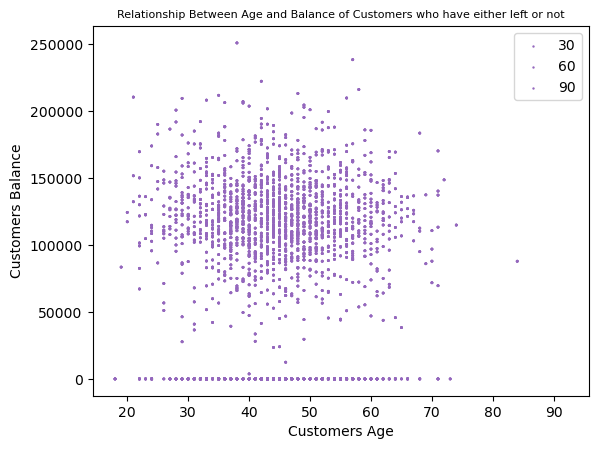

In [37]:
base_color=sns.color_palette()[4]
plt.scatter(data=churn, x='age', y='balance', s='exited', color=base_color)

sizes=[30,60,90]
legend_obj=[]

for size in sizes:
    legend_obj.append(plt.scatter(data=churn, x='age', y='balance', s='exited', color=base_color))
plt.legend(legend_obj, sizes)
plt.xlabel('Customers Age')
plt.ylabel('Customers Balance')
plt.title('Relationship Between Age and Balance of Customers who have either left or not',
          fontsize=8);

## Question 10(What is The Impact of Customers Credit Score On Their Estimated Salary?)

In [38]:
churn.shape

(10000, 11)

In [39]:
sample=np.random.choice(churn.shape[0], 500, replace=False)
churn_subset=churn.loc[sample]
churn_subset.head()

,creditscore,geography,gender,age,tenure,balance,number_of_products,has_credit_card,is_active_member,estimated_salary,exited
4596,567,France,Male,38,6,127678.80,2,0,0,45422.89,0
4449,666,France,Male,36,3,0.00,2,1,0,35156.54,0
4660,537,France,Female,41,0,0.00,2,0,1,175262.49,0
79,416,Germany,Female,41,10,122189.66,2,1,0,98301.61,0
4130,554,France,Male,39,2,129709.62,1,1,0,173197.12,0


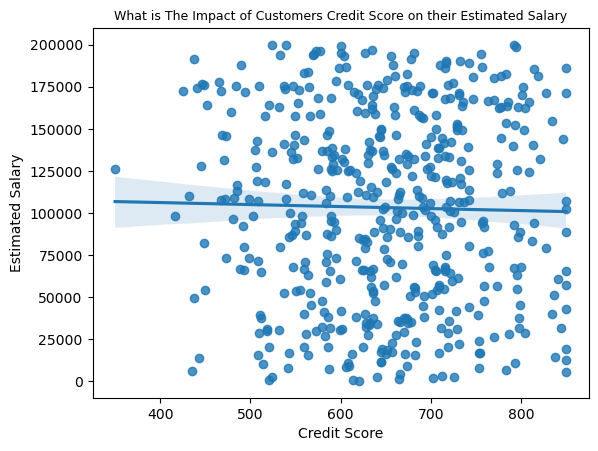

In [40]:
sns.regplot(data=churn_subset, x='creditscore', y='estimated_salary')
plt.xlabel('Credit Score')
plt.ylabel('Estimated Salary')
plt.title('What is The Impact of Customers Credit Score on their Estimated Salary', fontsize=9);

## Question 11(What is the realationship between All features and Customers Who have left or not?)

<AxesSubplot:>

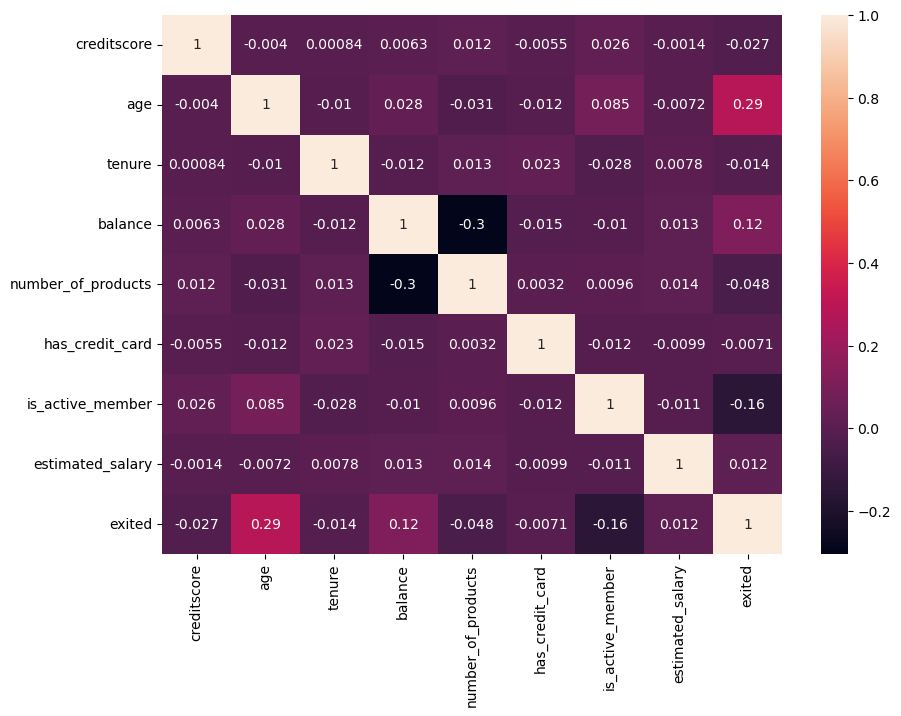

In [41]:
plt.figure(figsize=[10,7])
sns.heatmap(data=churn.corr(), annot=True)

From the Heatmap above, it seen that since the relationship between the features and the target is not a linear one, most of the features do no have a good relationship with the label.